In [1]:
#importing libraries
import os, pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import chi2_contingency
from pandas.api.types import CategoricalDtype
import xlsxwriter



In [2]:
#file set up/ getting work directories
cur_dir = os.getcwd()
cur_dir
file_name = 'People Analytics Data Science and Reporting - Case Study FINAL.xlsx'


os.makedirs(cur_dir+'/Q1_Outputs',exist_ok=True)
os.makedirs(cur_dir+'/Q2_Outputs',exist_ok=True)
os.makedirs(cur_dir+'/Q3_Outputs',exist_ok=True)



#reading the data into a dataframe
df_activity = pd.read_excel(cur_dir + '/' + file_name, sheet_name = "Recruiting Activity Data",skiprows=[1],header=1)
df_activity
df_offer = pd.read_excel(cur_dir + '/' + file_name, sheet_name = "Offer Response Data")
df_offer


,Candidate ID Number,Offer Decision
0,3368,Offer Accepted
1,10008,Offer Accepted
2,2790,Offer Accepted
3,3500,Offer Accepted
4,2675,Offer Accepted
...,...,...
129,2510,Offer Response Pending
130,2480,Offer Response Pending
131,2556,Offer Response Pending
132,2501,Offer Response Pending


In [3]:
#Get highest Degree ever obtained 
#Assumption: JD is considered Masters, so they have the same score with Master. 
degree_dict = {"PhD": 1, "Masters": 2,"JD":2, "Bachelors": 3}

def get_highest_degree_level(row):
    degree_levels = []
    for degree in ["Degree", "Degree.1", "Degree.2", "Degree.3"]:
        degree_value = row[degree]
        if not pd.isna(degree_value):
            degree_levels.append(degree_value)
    if not degree_levels:
        return None

    # Get degree with the lowest value in the dictionary(Note the highest is labled as 1 and lowest labled as 3)
    highest_degree = min(degree_levels, key=lambda x: degree_dict.get(x, 4), default=None)

    return highest_degree

df_activity["Highest Degree Level"] = df_activity.apply(get_highest_degree_level, axis=1)

# Print the DataFrame
df_activity
# df[df['Candidate ID Number']==2601]
# df.to_csv(cur_dir+'output.csv', index=False)



,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,...,Degree.1,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,Highest Degree Level
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,Bachelors,NYU,...,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,Bachelors,Columbia,...,Masters,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN,Masters
3,39321,System Engineer,Engineering,New Application,2018-09-04,Career Fair,0,Campus,Bachelors,University of Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
4,222272,Operations Generalist,Operations,New Application,2018-11-08,Campus Job Board,2,Campus,PhD,NYU,...,Bachelors,Columbia,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,6166724,System Engineer,Engineering,Phone Screen,2018-08-13,Career Fair,1,Campus,PhD,Columbia,...,Bachelors,UC Berkeley,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,PhD
7404,1718459,System Engineer,Engineering,In-House Interview,2016-10-01,Career Fair,0,Campus,Bachelors,MIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
7405,10008,System Engineer,Engineering,Offer Sent,2016-08-08,Campus Event,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
7406,4432109,Operations Coordinator,Operations,New Application,2016-10-13,Campus Job Board,2,Campus,Bachelors,University of Texas,...,PhD,MIT,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,PhD


In [4]:
#get associated highest degree's School and Major.
def get_associated_school_major(row):
    degree_fields = ["Degree", "Degree.1", "Degree.2", "Degree.3"]
    school_fields = ["School", "School.1", "School.2", "School.3"]
    major_fields = ["Major", "Major.1", "Major.2", "Major.3"]

    highest_degree_level = row["Highest Degree Level"]

    for degree, school, major in zip(degree_fields, school_fields, major_fields):
        degree_value = row[degree]
        if degree_value == highest_degree_level or degree_value == "JD":
            return row[school], row[major]

    return None, None

df_activity[["Associated School", "Associated Major"]] = df_activity.apply(get_associated_school_major, axis=1, result_type="expand")
df_activity
# df[df['Candidate ID Number']==2601]
# df.to_csv(cur_dir+'output.csv', index=False)



,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,...,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,Highest Degree Level,Associated School,Associated Major
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,Bachelors,NYU,...,Physics,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,NYU,Computer Science
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,Harvard,Political Science
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,Bachelors,Columbia,...,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN,Masters,NYU,Computer Science
3,39321,System Engineer,Engineering,New Application,2018-09-04,Career Fair,0,Campus,Bachelors,University of Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,University of Washington,Computer Science
4,222272,Operations Generalist,Operations,New Application,2018-11-08,Campus Job Board,2,Campus,PhD,NYU,...,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,PhD,NYU,Physics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,6166724,System Engineer,Engineering,Phone Screen,2018-08-13,Career Fair,1,Campus,PhD,Columbia,...,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,PhD,Columbia,Statistics
7404,1718459,System Engineer,Engineering,In-House Interview,2016-10-01,Career Fair,0,Campus,Bachelors,MIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,MIT,Computer Science
7405,10008,System Engineer,Engineering,Offer Sent,2016-08-08,Campus Event,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,Harvard,Computer Science
7406,4432109,Operations Coordinator,Operations,New Application,2016-10-13,Campus Job Board,2,Campus,Bachelors,University of Texas,...,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,PhD,MIT,Computer Science


In [5]:
df = pd.merge(df_activity, df_offer, on='Candidate ID Number', how='left')


In [6]:
mask = (df['Furthest Recruiting Stage Reached'] == 'Offer Sent') & (df['Offer Decision'] == 'Offer Accepted')
df.loc[mask, 'Furthest Recruiting Stage Reached'] = 'Offer Accepted'


In [7]:
df.to_csv(cur_dir+'/Q1_Outputs/1.Raw_data_output.csv', index=False)
# df

In [8]:
df_tmp = df.copy(deep=True)

# Define the order of the stages
stage_order = ['new application', 'phone screen', 'in-house interview', 'offer sent', 'offer accepted']

# Normalize the 'Furthest Recruiting Stage Reached' column to lower case and remove any leading or trailing spaces
df_tmp['Furthest Recruiting Stage Reached'] = df_tmp['Furthest Recruiting Stage Reached'].str.lower().str.strip()

# Create a categorical type for stages with a specified order
df_tmp['Furthest Recruiting Stage Reached'] = pd.Categorical(df_tmp['Furthest Recruiting Stage Reached'], categories=stage_order, ordered=True)

# Replace String JD with Masters
df_tmp['Highest Degree Level'] = df_tmp['Highest Degree Level'].replace('JD', 'Masters')

# Create a pivot table for each department and highest degree level by furthest stage reached and count of candidate ID
pivot_df = df_tmp.pivot_table(index=['Department', 'Highest Degree Level', 'Furthest Recruiting Stage Reached'], 
                          values='Candidate ID Number', 
                          aggfunc='count').rename(columns={'Candidate ID Number': 'Applicants'})



# Update the count of "Offer Sent" applicants to include the count of "Offer Accepted" applicants
offer_accepted_index = pivot_df[pivot_df.index.get_level_values('Furthest Recruiting Stage Reached') == 'offer accepted'].index
offer_sent_index = pivot_df[pivot_df.index.get_level_values('Furthest Recruiting Stage Reached') == 'offer sent'].index
pivot_df.loc[offer_sent_index, 'Applicants'] += pivot_df.loc[offer_accepted_index, 'Applicants'].values

# Add Conversion Rate column
pivot_df['Conversion Rate'] = (pivot_df.groupby(['Department', 'Highest Degree Level'], group_keys=False)['Applicants']
                                    .apply(lambda x: x.div(x.shift()) * 100))
# Reset the index to make 'Furthest Recruiting Stage Reached' a regular column again
pivot_df = pivot_df.reset_index()

# Rename the stages for final output
pivot_df['Furthest Recruiting Stage Reached'] = pivot_df['Furthest Recruiting Stage Reached'].str.title()

# Sort the pivot_df by Department, Highest Degree Level, and Stage
pivot_df['Furthest Recruiting Stage Reached'] = pd.Categorical(pivot_df['Furthest Recruiting Stage Reached'], 
                                                               categories=[s.title() for s in stage_order], ordered=True)

pivot_df = pivot_df.sort_values(["Department", "Highest Degree Level", "Furthest Recruiting Stage Reached"])

pivot_df['Conversion Rate'] = pivot_df['Conversion Rate'].replace(np.inf, 100)

pivot_df


,Department,Highest Degree Level,Furthest Recruiting Stage Reached,Applicants,Conversion Rate
0,Engineering,Bachelors,New Application,1186,NaN
1,Engineering,Bachelors,Phone Screen,150,12.647555
2,Engineering,Bachelors,In-House Interview,90,60.000000
3,Engineering,Bachelors,Offer Sent,33,36.666667
4,Engineering,Bachelors,Offer Accepted,18,54.545455
...,...,...,...,...,...
85,Sales,PhD,New Application,82,NaN
86,Sales,PhD,Phone Screen,19,23.170732
87,Sales,PhD,In-House Interview,13,68.421053
88,Sales,PhD,Offer Sent,1,7.692308


In [9]:
pivot_df.to_csv(cur_dir+'/Q1_Outputs/2.Funnel_output.csv', index=False)
# pivot_df


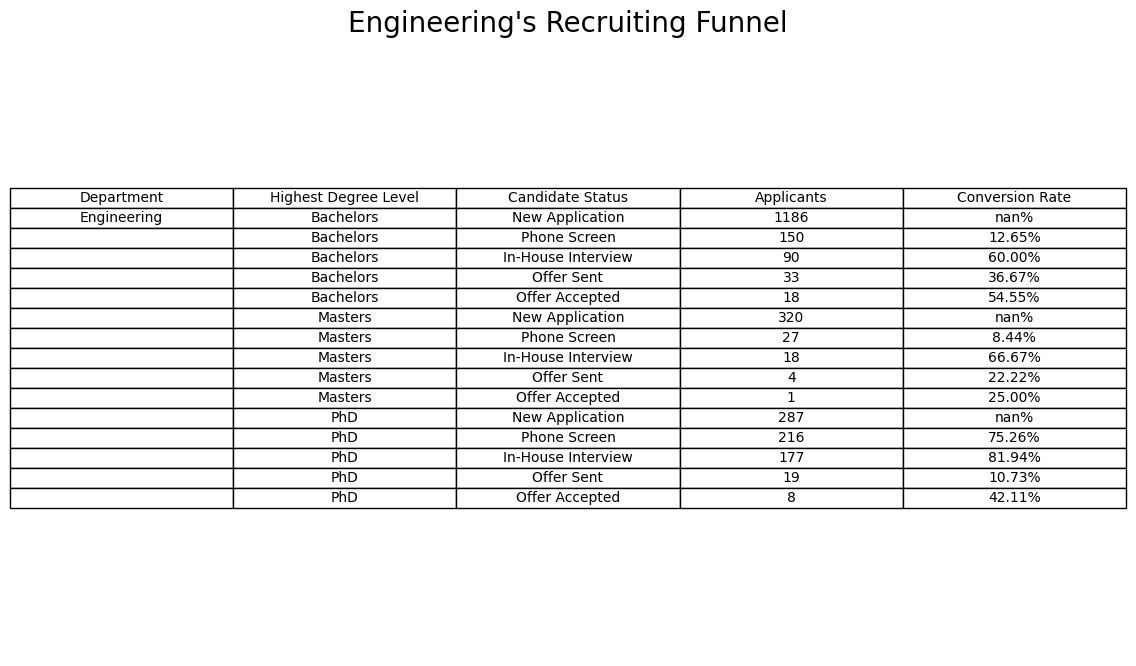

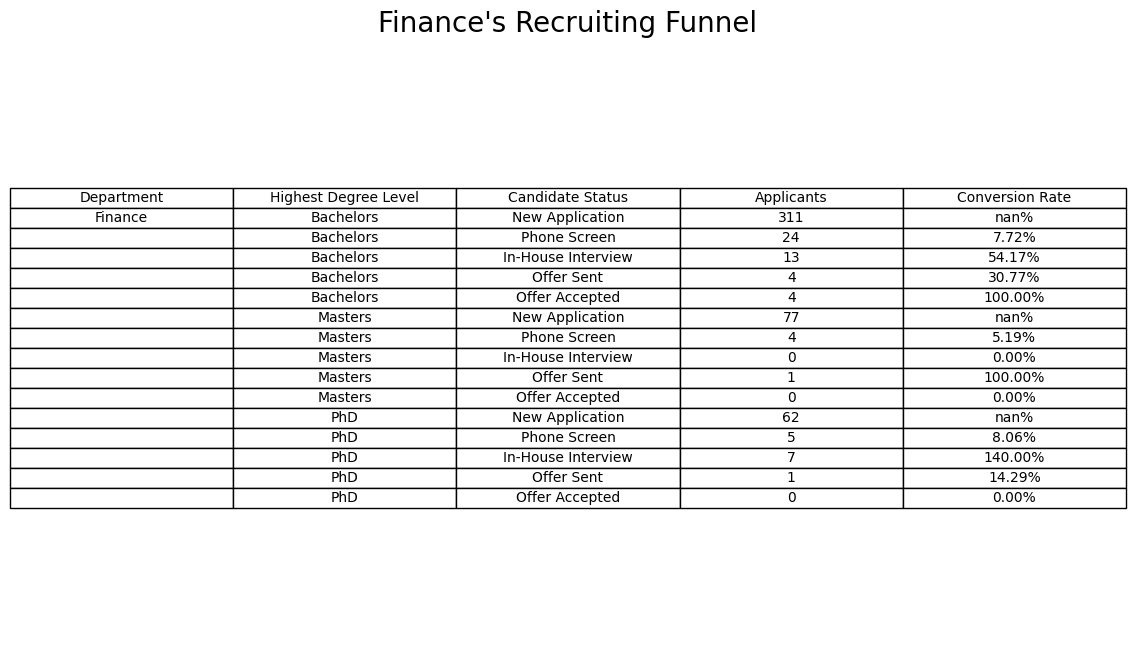

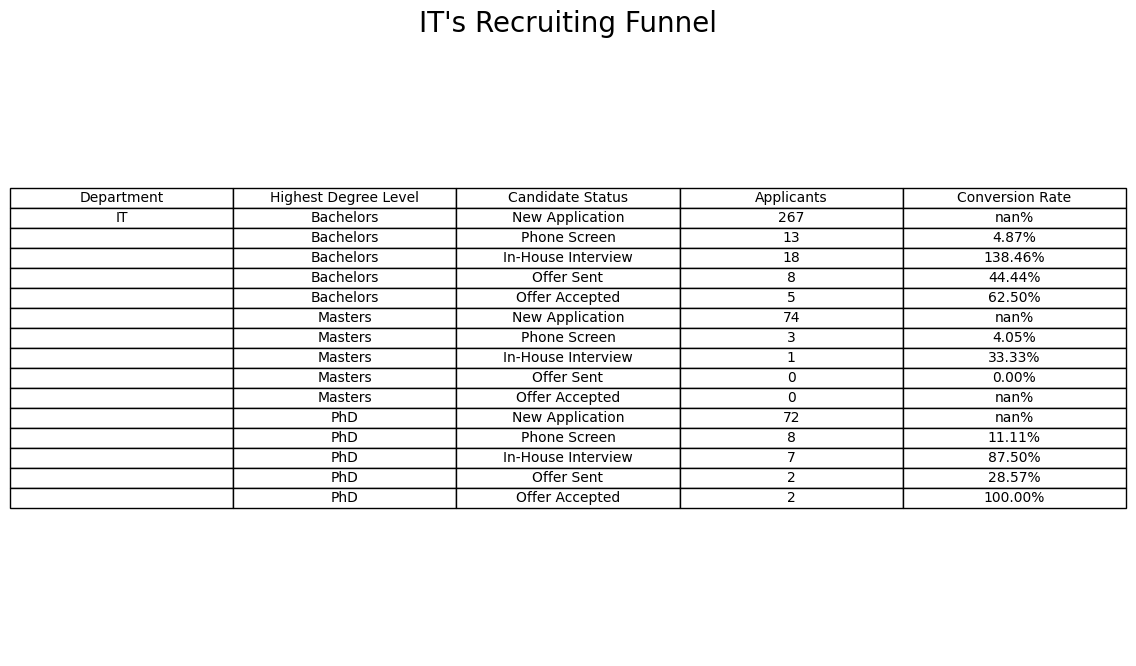

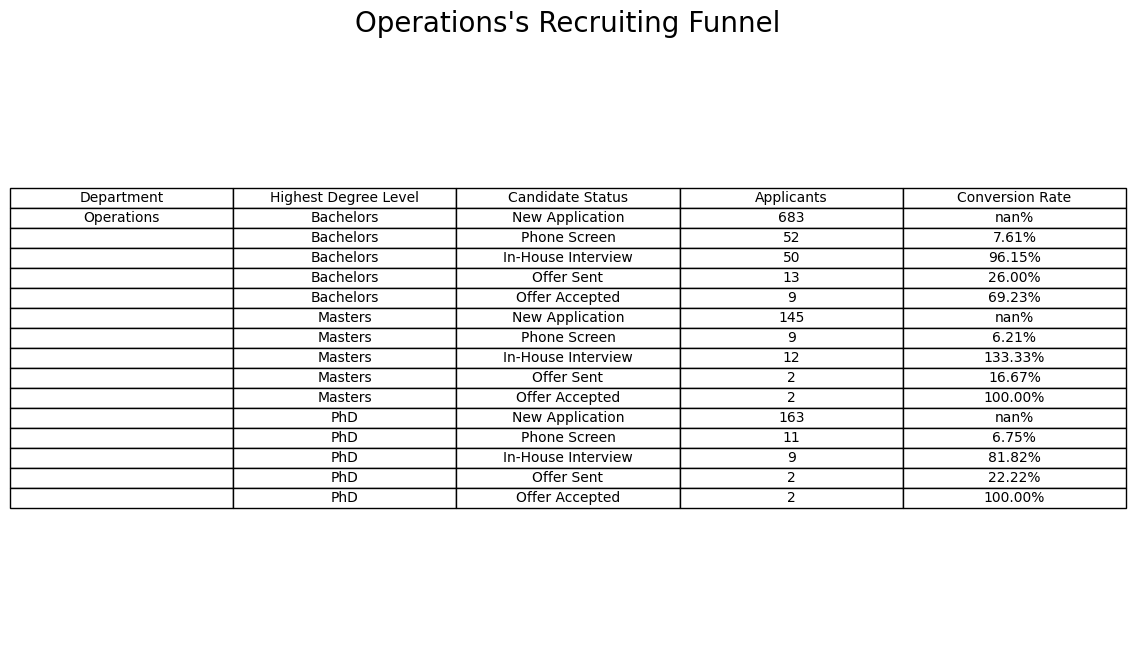

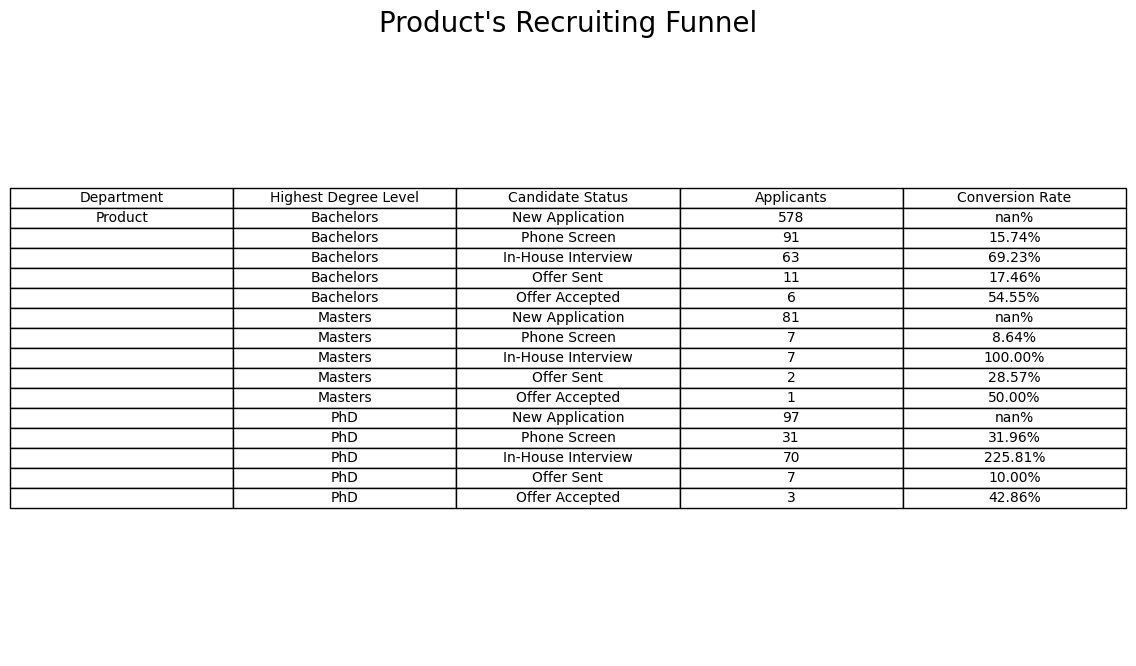

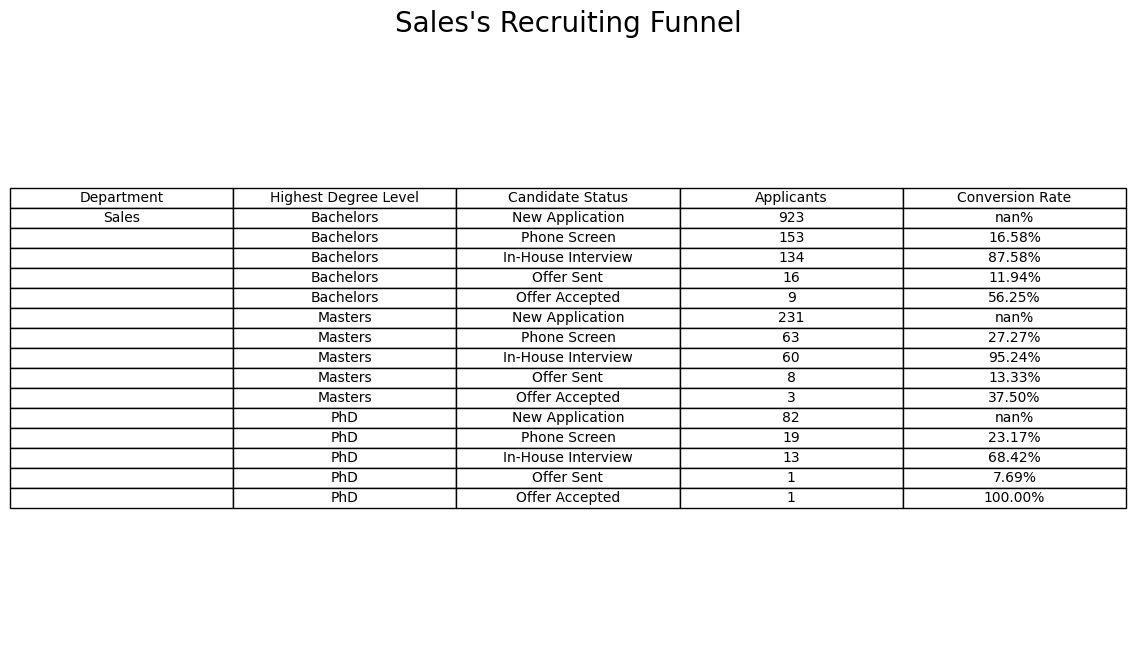

In [10]:
from pandas.api.types import CategoricalDtype


# Function to format conversion rate
def format_conversion_rate(val):
    try:
        val = float(val)
        return f'{val:.2f}%'
    except ValueError:
        return val

# Apply function to Conversion Rate column
pivot_df['Conversion Rate'] = pivot_df['Conversion Rate'].apply(format_conversion_rate)

# Rename 'Furthest Recruiting Stage Reached' with 'Candidate Status'
pivot_df = pivot_df.rename(columns={'Furthest Recruiting Stage Reached': 'Candidate Status'})

# Define a custom ordering for 'Highest Degree Level' and 'Candidate Status'
degree_order = CategoricalDtype(['Bachelors', 'Masters', 'PhD'], ordered=True)
pivot_df['Highest Degree Level'] = pivot_df['Highest Degree Level'].astype(degree_order)

status_order = CategoricalDtype(['New Application', 'Phone Screen', 'In-House Interview', 'Offer Sent', 'Offer Accepted'], ordered=True)
pivot_df['Candidate Status'] = pivot_df['Candidate Status'].astype(status_order)

# Split the data by department and sort by degree level and candidate status
grouped = pivot_df.sort_values(['Department', 'Highest Degree Level', 'Candidate Status']).groupby('Department')

for name, group in grouped:
    group = group.copy()
    group['Department'] = group['Department'].mask(group['Department'].duplicated(), '')  # Only show department once per degree level
    fig, ax = plt.subplots(figsize=(12,8))
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(f"{name}'s Recruiting Funnel", fontsize=20) # Add title

    # Create the table and add borders
    the_table = ax.table(cellText  = group.values, colLabels=group.columns, cellLoc='center', loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(1.2, 1.2)

    # Apply borders to cells
    for key, cell in the_table.get_celld().items():
        cell.set_edgecolor('black')

    # Save to PDF
    pp = PdfPages(cur_dir + f"/Q1_Outputs/{name} Department Funnel.pdf")
    pp.savefig(fig, bbox_inches='tight')
    pp.close()

In [11]:
#Q2

# Step 1: Filter the dataframe
df_stats = df.copy(deep=True)


# Step 2: Preprocess the data
df_stats['Furthest Recruiting Stage Reached'] = df_stats['Furthest Recruiting Stage Reached'].str.lower()

# Step 3: Filter to relevant candidates
filtered_data = df_stats[df_stats['Furthest Recruiting Stage Reached'].isin(['in-house interview', 'offer sent', 'offer accepted', 'phone screen','new application'])]
filtered_data = filtered_data[filtered_data['Application Source'].isin(['Career Fair', 'Campus Event'])]

# Step 4: Calculate the in-house interview rates for each year
filtered_data['Year'] = pd.to_datetime(filtered_data['Date of Application']).dt.year
filtered_data['In-House'] = filtered_data['Furthest Recruiting Stage Reached'] == 'in-house interview'
filtered_data
# Step 5: Perform pairwise chi-squared tests and identify statistically significant differences
results = []
years = filtered_data['Year'].unique()


for i in range(len(years)):
    for j in range(i + 1, len(years)):
        year1_inhouse = filtered_data[(filtered_data['Year'] == years[i]) & filtered_data['In-House']].shape[0]
        year1_tot = filtered_data[(filtered_data['Year'] == years[i]) ].shape[0]
        year2_inhouse = filtered_data[(filtered_data['Year'] == years[j]) & filtered_data['In-House']].shape[0]
        year2_tot = filtered_data[(filtered_data['Year'] == years[j]) ].shape[0]

        # Create a contigency table and fit a Chi-Squred test
        contingency_table = pd.DataFrame(
            [[year1_inhouse, year1_tot],
             [year2_inhouse, year2_tot]],
            columns=['In-House', 'All Applicants'],
            index=[years[i], years[j]]
        )
        
        _, p_value, _, _ = chi2_contingency(contingency_table)
        results.append((years[i], years[j], p_value))
        

# Print results
results.sort(key=lambda x: x[2])
for result in results:
    year1, year2, p_value = result
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f"Comparison between {year1} and {year2}: p-value = {p_value:.4f} ({significance})")

Comparison between 2018 and 2017: p-value = 0.0180 (Significant)
Comparison between 2016 and 2018: p-value = 0.0905 (Not Significant)
Comparison between 2016 and 2017: p-value = 0.5850 (Not Significant)


In [ ]:
"""
A chi-squred contigency test was performed on each pair of in-house candidate rates. 
Results indicates that rates between 2017 and 2018 are statistaically significant (p-value < 0.05). 
Rates between .... not significant. 

"""

In [12]:
#Q3 data prep

#assumes when the applicant's [Furthest Recruiting Stage Reached] is "New Application", then they were filtered out by the bot screening. 
df_vis = df.copy(deep=True)


# Normalize the stages to lower case
df_vis['Furthest Recruiting Stage Reached'] = df_vis['Furthest Recruiting Stage Reached'].str.lower()

# Define the stages that involve human effort and bot stage
human_effort_stages = ['phone screen', 'in-house interview', 'offer sent', 'offer accepted']
bot_stage = ['new application']
team_effort_stages = ['in-house interview', 'offer sent', 'offer accepted']

# Add columns to mark if the furthest stage involves human effort, bot stage, team effort stage, and if offer is accepted
df_vis['Human_Effort_Involved'] = df_vis['Furthest Recruiting Stage Reached'].isin(human_effort_stages)
df_vis['Bot_Stage'] = df_vis['Furthest Recruiting Stage Reached'].isin(bot_stage)
df_vis['Team_Effort_Involved'] = df_vis['Furthest Recruiting Stage Reached'].isin(team_effort_stages)
df_vis['Offer_Accepted'] = (df_vis['Furthest Recruiting Stage Reached'] == 'offer accepted').astype(int)

# Calculate HR_Filtered and Team_effort_not_hired for each row
df_vis['HR_Filtered'] = df_vis['Human_Effort_Involved'] & (~df_vis['Team_Effort_Involved'])
df_vis['Team_effort_not_hired'] = df_vis['Team_Effort_Involved'] & (~df_vis['Offer_Accepted'])

# Convert boolean values to integers
df_vis['HR_Filtered'] = df_vis['HR_Filtered'].astype(int)
df_vis['Team_effort_not_hired'] = df_vis['Team_effort_not_hired'].astype(int)

# Define the list of item combinations for the for loop
item_combinations = [['Application Source'], ['Application Source', 'Department']]

for items in item_combinations:
    # Calculate the metrics for each Application Source
    grouped = df_vis.groupby(items).agg(
        Total_Applicants=('Candidate ID Number', 'count'),
        Bot_Filtered=('Bot_Stage', 'sum'),
        HR_Filtered = ('HR_Filtered','sum'),
        Team_effort_not_hired = ('Team_effort_not_hired','sum'),
        Total_Candidates_Human_Effort=('Human_Effort_Involved', 'sum'),
        Team_Effort_Candidates=('Team_Effort_Involved', 'sum'),
        Accepted_Offers=('Offer_Accepted', 'sum'),
        Avg_Years_Experience=('Years of Experience', lambda x: x[df_vis['Offer_Accepted'] == 1].mean())
    ).reset_index()

    # Calculate effectiveness
    grouped['Bot_Screen_rate'] = grouped['Bot_Filtered'] / grouped['Total_Applicants']
    grouped['HR_Screen_rate'] = grouped['HR_Filtered'] / grouped['Total_Candidates_Human_Effort']
    grouped['Team_Effectiveness'] = grouped['Accepted_Offers'] / grouped['Team_Effort_Candidates']
    grouped['Overall_Effectiveness'] = grouped['Accepted_Offers'] / grouped['Total_Candidates_Human_Effort']

    # Sum the specified columns for the 'Overall' row
    total_applicants = grouped['Total_Applicants'].sum()
    bot_filtered = grouped['Bot_Filtered'].sum()
    hr_filtered = grouped['HR_Filtered'].sum()
    team_effort_not_hired = grouped['Team_effort_not_hired'].sum()
    total_candidates_human_effort = grouped['Total_Candidates_Human_Effort'].sum()
    team_effort_candidates = grouped['Team_Effort_Candidates'].sum()
    accepted_offers = grouped['Accepted_Offers'].sum()

    # Calculate the rates for the 'Overall' row
    bot_screen_rate = bot_filtered / total_applicants
    hr_screen_rate = hr_filtered / total_candidates_human_effort
    team_effectiveness = accepted_offers / team_effort_candidates
    overall_effectiveness = accepted_offers / total_candidates_human_effort
    avg_years_experience = df_vis.loc[df_vis['Offer_Accepted'] == 1, 'Years of Experience'].mean()

    # Create a new DataFrame for the 'Overall' row
    overall = pd.DataFrame({
        items[0]: ['Overall'],
        'Total_Applicants': [total_applicants],
        'Bot_Filtered': [bot_filtered],
        'HR_Filtered':[hr_filtered],
        'Team_effort_not_hired' :[team_effort_not_hired],
        'Total_Candidates_Human_Effort': [total_candidates_human_effort],
        'Team_Effort_Candidates': [team_effort_candidates],
        'Accepted_Offers': [accepted_offers],
        'Avg_Years_Experience': [avg_years_experience],
        'Bot_Screen_rate': [bot_screen_rate],
        'HR_Screen_rate': [hr_screen_rate],
        'Team_Effectiveness': [team_effectiveness],
        'Overall_Effectiveness': [overall_effectiveness]
    })

    # Append the 'Overall' row to the grouped DataFrame
    grouped = pd.concat([grouped, overall], ignore_index=True)

    # Save the DataFrame to a CSV file
    filename = '_'.join(items).lower() + '_effectiveness.csv'
    grouped.to_csv(cur_dir + '/Q3_Outputs' + filename, index=False)
    print(f"Finished groupby combination: {items}")

Finished groupby combination: ['Application Source']
Finished groupby combination: ['Application Source', 'Department']


In [13]:
#Step 2 
#Data prep for Waterfall
df_wf = pd.read_csv(cur_dir+'/Q3_Outputs/application source_department_effectiveness.csv')
df_wf = df_wf[(df_wf['Application Source'] != 'Overall') & (df_wf['Department'] != 'Overall')]


# Select the relevant columns and apply transformations
df_wf_transformed = df_wf[['Application Source', 'Department', 'Total_Applicants', 'Bot_Filtered', 'HR_Filtered', 'Team_effort_not_hired', 'Accepted_Offers']].copy()
df_wf_transformed['Bot_Filtered'] = -df_wf_transformed['Bot_Filtered']
df_wf_transformed['HR_Filtered'] = -df_wf_transformed['HR_Filtered']
df_wf_transformed['Team_effort_not_hired'] = -df_wf_transformed['Team_effort_not_hired']

# Melt the dataframe
df_wf_melted = df_wf_transformed.melt(id_vars=['Application Source', 'Department'], var_name='Attribute', value_name='Measure')
df_wf_melted
# df_wf_melted.to_csv(cur_dir + '/Q3_Outputs/' + "Waterfall.csv", index=False)
df_wf_melted.to_excel(cur_dir+'/Q3_Outputs/Waterfall.xlsx', engine='xlsxwriter',index=False)  
print("Job Finished, Check folder: " + cur_dir + "/Q3_Outputs/")


Job Finished
